# Primer Examen 15%

## Ejercicio 1
El siguiente url entrega 100 artículos (ver`/work?rows=100` al final del url) de la revista con el ISSN: 1029-8479 correspondiente a "Journal of High Energy Physics" en formato JSON usando el API de CrossRef:

https://api.crossref.org/journals/1029-8479/works?rows=100

La base de datos con los 100 artículos que tambíen se puede cargar en otro DataFrame de Pandas, se encuentra anidada en la celda con fila `'items'` y columna `'messages'` la cual se puede obtener con el método `.loc['items','message']` del DataFrame original.

Obtenga la lista de DOIs para los artículos de Alessandro Strumia en esa base de datos anidada

## Ejercicio 2
2a) Genere un polinomio de numpy con 7 raices aleatorias entre 1 y 10

2b) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

2c) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

2d) Grafique el polinomío inclueyendo los puntos asociados a las raices.

In [21]:
import requests
import json

In [22]:
r = requests.get('https://api.crossref.org/journals/1029-8479/works?rows=100')
data = json.loads(r.text)

dicts = data['message']['items']

dois = []
for item in dicts:
    for author in item['author']:
        if author['given'] == 'Alessandro' and author['family'] == 'Strumia':
            dois.append(item['DOI'])

print(dois)

['10.1088/1126-6708/2000/12/016', '10.1088/1126-6708/2001/11/048']


In [29]:
#Solución ejercicio 2

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [24]:
#Numeral a

raices = np.random.randint(low=1, high=10, size=7)
poli = np.polynomial.polynomial.polyfromroots(raices)

print("El polinomio es ",poli[0]," + ",poli[1],"x + ",poli[2],"x^2 + ",poli[3],"x^3 + ",poli[4],"x^4 + ",poli[5],"x^5 + ",poli[6],"x^6 + ",poli[7],"x^7")
print("Las raices son: ",raices)

El polinomio es  -76545.0  +  153819.0 x +  -108297.0 x^2 +  37419.0 x^3 +  -7115.0 x^4 +  761.0 x^5 +  -43.0 x^6 +  1.0 x^7
Las raices son:  [3 5 9 1 9 9 7]


In [25]:
#Numeral b
p = np.poly1d(poli[::-1]) #se pone poli[::-1] porque hay que pasarlos en orden descendente

derivada = p.deriv()
print("La derivada del polinomio es\n",derivada)

La derivada del polinomio es
    6       5        4             3             2
7 x - 258 x + 3805 x - 2.846e+04 x + 1.123e+05 x - 2.166e+05 x + 1.538e+05


In [26]:
raices_der = derivada.r
print("Los puntos criticos del polinomio (las raices de la derivada) son: ", raices_der)

Los puntos criticos del polinomio (las raices de la derivada) son:  [9.        +1.31582246e-06j 9.        -1.31582246e-06j
 7.66408628+0.00000000e+00j 5.81653715+0.00000000e+00j
 3.75651039+0.00000000e+00j 1.62000905+0.00000000e+00j]


In [27]:
#Numeral c
def f(x):
  return p.__call__(x)

res = optimize.minimize_scalar(f, bounds=(1, 10), method='bounded')
print(res.x)

3.756510928899096


Vemos que el mínimo encontrado usando una función de la libreria scipy conincide con uno de los puntos críticos del polinomio


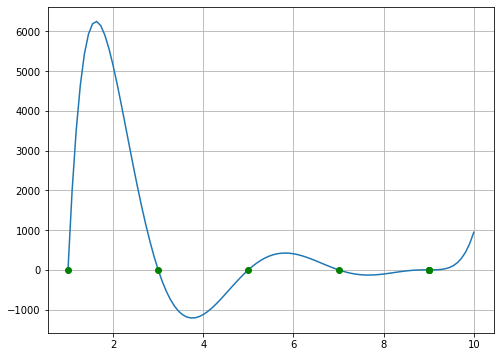

In [28]:
#Numeral d
x = np.linspace(1,10,100)

plt.figure(figsize=(8,6))
plt.plot(x,p.__call__(x))
plt.plot(raices,[0,0,0,0,0,0,0],"go")
plt.grid()
plt.show()